



# Project: Investigate a Dataset - [No-Show Appointments - Kagglev2 - May 2016]



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> No-Show Appointments is a 100K+ entries dataset that collects information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 


### Questions for Analysis
>Throughout this study we are going to answer the four following questions:
<br>&emsp;1. What is the effect of age and gender on the no-show factor?
<br>&emsp;2. Is there a particular chronic disease\disability that contributes noticeably more to the no-show factor?
<br>&emsp;3. How far does the Bolsa Familia Scholarship affect the no-show factor?
<br>&emsp;4. Does it make a difference that the patient receives an SMS before the appointment.

In [1]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness to decide what steps needed to clean the dataframe.

In [2]:
# Loading the dataset and exploring its initial view.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


    We need to rename columns in a consistent way and correct some spelling mistakes and drop some unnecessary columns.

In [3]:
# Checking the size of dataframe.

df.shape

(110527, 14)

In [4]:
# Checking for missing values.

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

    There are no missing values.

In [5]:
# Checking for duplicates.

df.duplicated().sum()

0

    There are no duplicates.

In [6]:
# Checking number of unique values in each column.

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

    Looks like 'Handcap' column has more than the 0 and 1 values, let's see.

In [7]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
# Checking the data type of each column for consistency.

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

    We need to change 'No-show' column to 'int' data type.


### Data Cleaning
> In this section of the report, we are going to perform the cleaning steps checked in the Data Wrangling section.
 

In [9]:
# Renaming column names to be all lower case, replacing '-' with '_'.

df.rename(columns = lambda x: x.lower().replace('-', '_'), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Correcting spelling mistakes in 'handcap' and 'hipertension' columns.

df.rename(columns = {'handcap' : 'handicap', 'hipertension' : 'hypertension'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# Dropping columns 'patientid', 'appointmentid', 'scheduledday', 'appointmentday' and 'neighbourhood'
# as they are out of the scope of this study.

df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'neighbourhood'], axis=1, inplace=True)
df.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No


In [12]:
# Replacing the values of 'Yes' and 'No' in 'no_show' column with 1 and 0 for the ease of comparisons.

df.no_show.replace(['Yes', 'No'], [1, 0], inplace=True)
df.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0


In [13]:
#  Changing the data type of 'age' column to 'int'.

df.age.astype(int);
df.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0


In [14]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


    This is how the dataframe looks like after cleaning.

In [15]:
df.dtypes

gender          object
age              int64
scholarship      int64
hypertension     int64
diabetes         int64
alcoholism       int64
handicap         int64
sms_received     int64
no_show          int64
dtype: object

    Finally, making sure all data types are of 'int' type.

In [16]:
# Viewing main characteristics of te dataframe after cleaning.

df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> In this section of the report, we are going to explore data in multiple angles, create visualizations to answer questions of the study scope.




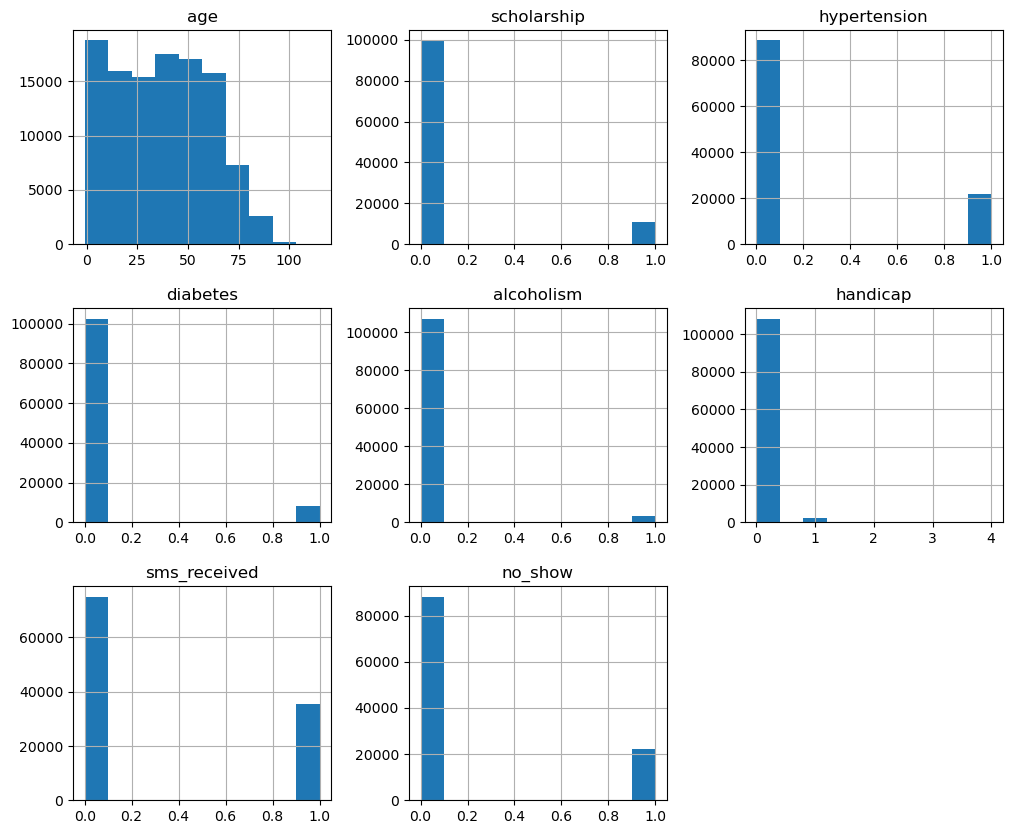

In [17]:
# First, let's look at a histogram of the whole dataframe.

df.hist(figsize=(12,10));

    We can see some quick observations here:
    1. Age is skewed to the right, i.e., most patients are below 50.
    2. Only less than 20,000 patients are enrolled in the Bolsa Familia Scholarship.
    3. Hypertension patients appear to be the most not showing up among other chronic diseases\disabilities patients. 
    4. Almost 40,000 patients have not received an SMS before appointment.
    5. More than 20,000 patients did not show up for their appointments.

### 1. What is the effect of age and gender on the no-show factor?

In [18]:
# Creating masks for thr dependent variable column for quick calling afterwards.

no_show = df.no_show == True
show = df.no_show == False

In [19]:
# Checking average of ages of patients who did not show up.

int(df.age[no_show].mean())

34

In [20]:
# Checking average of ages of patients who showed up.

int(df.age[show].mean())

37

    There is no significant difference between the averages of patients' ages who did or did not show up.

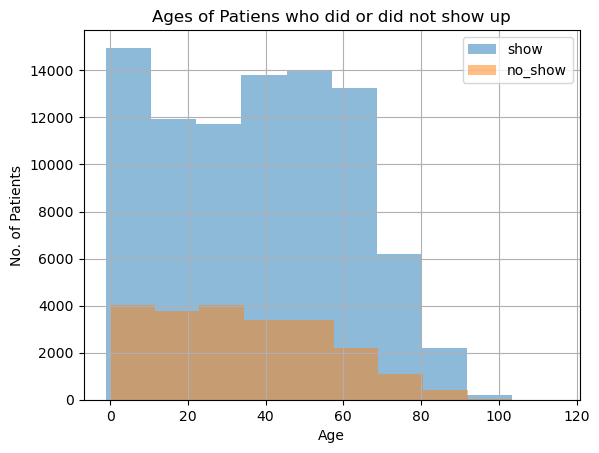

In [21]:
# Plotting the above result on a bar chart.

df.age[show].hist(alpha=0.5, bins=10, label='show')
df.age[no_show].hist(alpha=0.5, bins=10, label='no_show')
plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.title('Ages of Patiens who did or did not show up')
plt.legend();

    There is no specific age range in which patients did not show up more than they did.

In [22]:
# Creating a categorical variable 'age_group' from the quantitative variable 'age' using, to see its effect on 'no_show'.
# Children < 18 years old, Adults < 65 years old and Older Adults >= 65 years old.

bin_edges = [0, 18, 65, 115]
bin_names = ['children', 'adults', 'older_adults']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,0,1,0,0,0,0,0,adults
1,M,56,0,0,0,0,0,0,0,adults
2,F,62,0,0,0,0,0,0,0,adults
3,F,8,0,0,0,0,0,0,0,children
4,F,56,0,1,1,0,0,0,0,adults


In [23]:
# Calculating fractions of Age Groups not showing up.

df.groupby('age_group').mean().no_show

age_group
children        0.225372
adults          0.203426
older_adults    0.155327
Name: no_show, dtype: float64

    It's obvious that Older Adults are noticeably more committed to their appointments than Children and Adults.

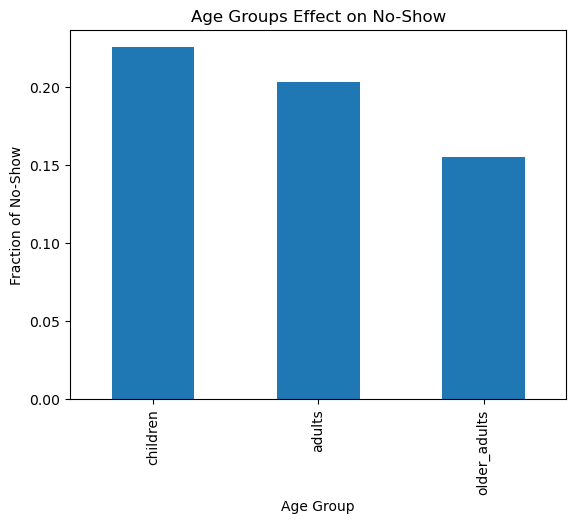

In [24]:
# Plotting the above result on a bar chart.

df.groupby('age_group').no_show.mean().plot(xlabel='Age Group', ylabel='Fraction of No-Show', title='Age Groups Effect on No-Show', kind='bar');

In [25]:
# Checking Gender percentage of not showing up patients.

df.groupby('gender').no_show.mean()

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

In [26]:
# Checking both Gender and Age Groups vs. No-Show.

df.groupby(['gender', 'age_group'])['no_show'].mean()

gender  age_group   
F       children        0.226026
        adults          0.206139
        older_adults    0.156604
M       children        0.224657
        adults          0.197049
        older_adults    0.152721
Name: no_show, dtype: float64

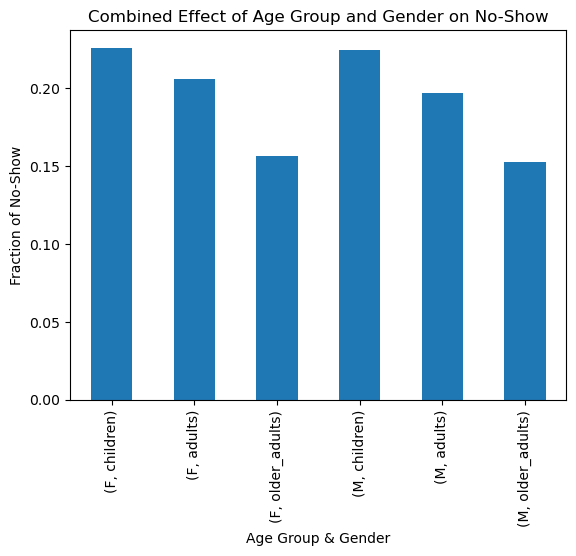

In [27]:
# Plotting the above result on a bar chart.

df.groupby(['gender', 'age_group'])['no_show'].mean().plot(xlabel='Age Group & Gender', ylabel='Fraction of No-Show', title='Combined Effect of Age Group and Gender on No-Show', kind='bar');

    Looks like the percentages of no-show up in both Genders are approximately the same, however, Older Adults show up more than Adults more than Children.

### 2. Is there a particular chronic disease\disability that contributes noticeably more to the no-show factor?

In [28]:
# Defining a function to plot each disease\disability vs. no-show.

def plot_disease(col1, title, xlabel):
    """
    A function to plot each disease\disability vs. no-show.
    Args:
        col1: Disease column.
        title: Tiltle of the chart between ''.
        xlabel: Label for x-axis between ''.
    Return:
        Bar chart.
    """
    sns.barplot(x=col1, y=no_show, order=col1.unique(), palette='Set2')
    plt.title(title, size=12)
    plt.xlabel(xlabel)
    plt.ylabel('Fraction of No-Show')
    plt.show();

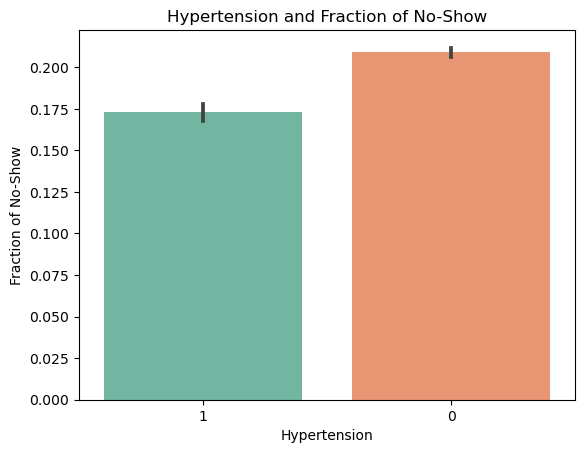

In [29]:
# Plotting Hypertension vs. No-Show.

plot_disease(df.hypertension, 'Hypertension and Fraction of No-Show', 'Hypertension')

In [30]:
# Calculating fraction of hypertension patients not showing up.

df.groupby('hypertension').no_show.mean()

hypertension
0    0.209037
1    0.173020
Name: no_show, dtype: float64

    17.3% of Hypertension patients did not show up.

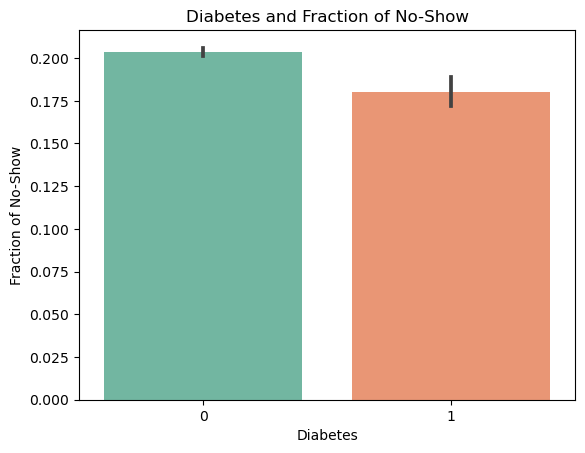

In [31]:
# Plotting Diabetes vs. No-Show.

plot_disease(df.diabetes, 'Diabetes and Fraction of No-Show', 'Diabetes')

In [32]:
# Calculating fraction of diabetes not showing up.

df.groupby('diabetes').no_show.mean()

diabetes
0    0.203628
1    0.180033
Name: no_show, dtype: float64

    18% of Diabetes did not show up.

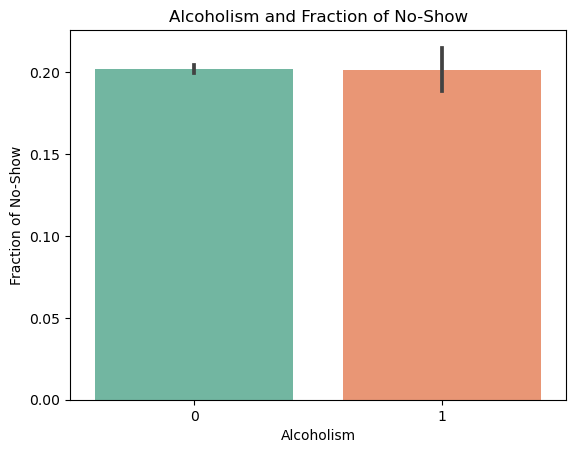

In [33]:
# Plotting Alcoholism Patients vs. No-Show.

plot_disease(df.alcoholism, 'Alcoholism and Fraction of No-Show', 'Alcoholism')

In [34]:
# Calculating fraction of alcoholism patients not showing up.

df.groupby('alcoholism').no_show.mean()

alcoholism
0    0.201946
1    0.201488
Name: no_show, dtype: float64

    20.14% of Alcoholism Patients did not show up.

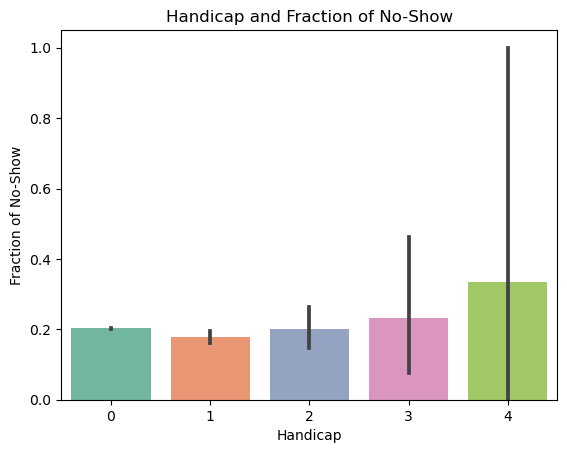

In [35]:
# Plotting Handicap vs. No-Show.

plot_disease(df.handicap, 'Handicap and Fraction of No-Show', 'Handicap')

In [36]:
# Calculating fraction of handicap patients not showing up.

df.groupby('handicap').no_show.mean()

handicap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: no_show, dtype: float64

    17.92% of Handicap '1' Patients did not show up.
    20.21% of Handicap '2' Patients did not show up.
    23.07% of Handicap '3' Patients did not show up.
    33.33% of Handicap '4' Patients did not show up.


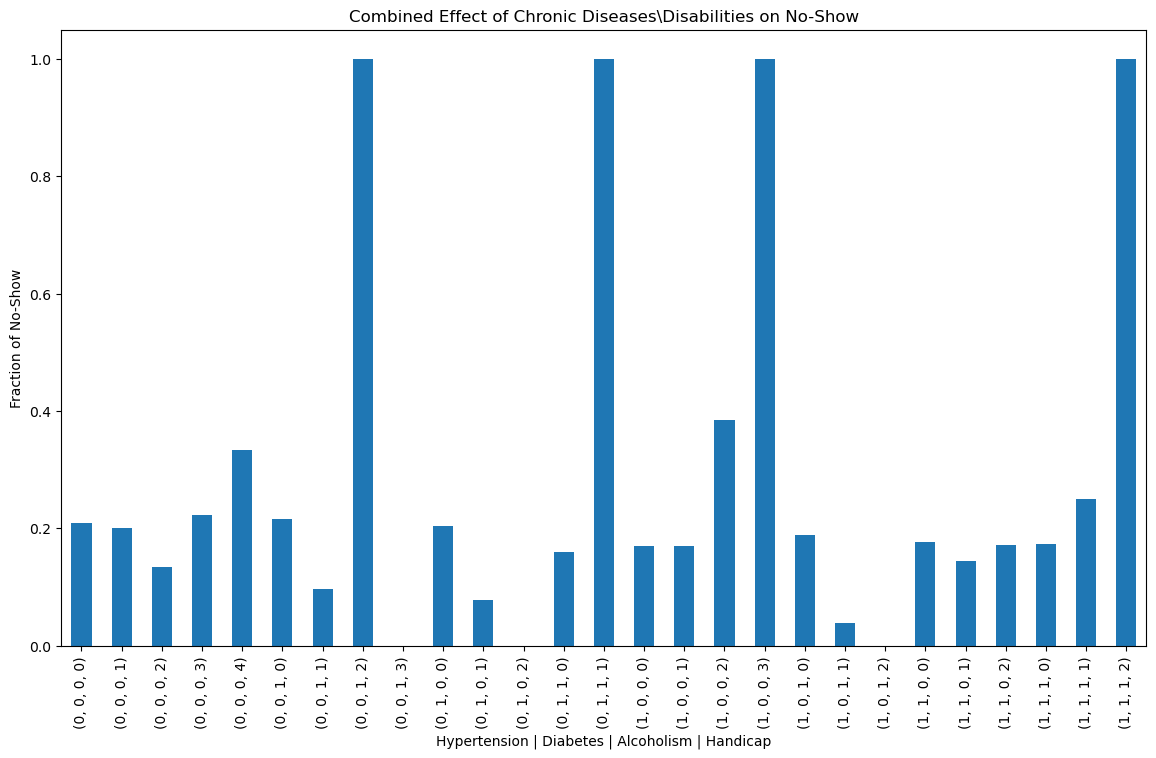

In [37]:
# Plotting combined effect of chronic diseases\disabilities vs. no-show on a bar chart.

df.groupby(['hypertension', 'diabetes', 'alcoholism', 'handicap']).no_show.mean().plot(xlabel='Hypertension | Diabetes | Alcoholism | Handicap', ylabel='Fraction of No-Show', title='Combined Effect of Chronic Diseases\Disabilities on No-Show', kind='bar', figsize=(14,8));

    This chart shows the fractions of patients with each combination of chronic diseases\disabilities who did not show up.

### 3. How far does the Bolsa Familia Scholarship affect the no-show factor?

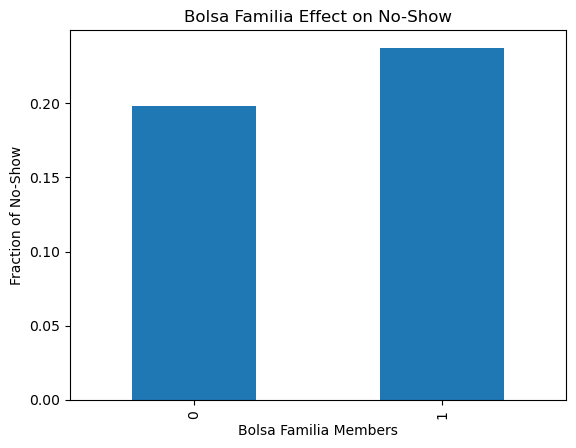

In [38]:
# Plotting the fraction of the above results.

df.groupby('scholarship').no_show.mean().plot(xlabel='Bolsa Familia Members', ylabel='Fraction of No-Show', title='Bolsa Familia Effect on No-Show', kind='bar');

In [39]:
# Calculating the fractions of Bolsa Familia member patients who did not show up.

df.groupby('scholarship').no_show.mean()

scholarship
0    0.198072
1    0.237363
Name: no_show, dtype: float64

    Bolsa Familia scholarship members seem to be not showing up more than non-members; 23.7% vs 19.8%.

### 4. Does it make a difference that the patient receives an SMS before the appointment.

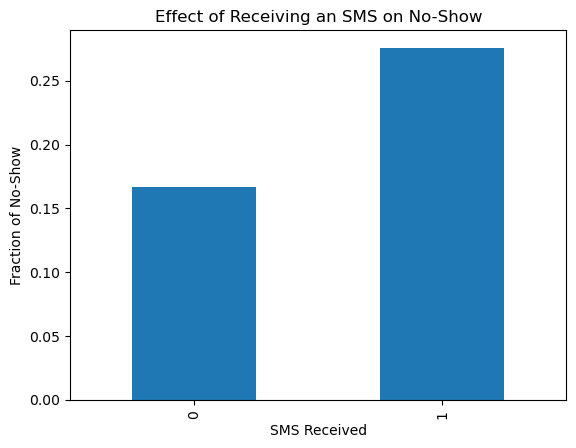

In [40]:
# Plotting the fraction of the above results.

df.groupby('sms_received').no_show.mean().plot(xlabel='SMS Received', ylabel='Fraction of No-Show', title='Effect of Receiving an SMS on No-Show', kind='bar');

In [41]:
# Calculating the fractions of patients who did and did not receive an SMS and did not show up.

df.groupby('sms_received').no_show.mean()

sms_received
0    0.167033
1    0.275745
Name: no_show, dtype: float64

    Patients who did not receive an SMS seem to be not showing up more than those who received an SMS; 27.5% vs 16.7%.

<a id='conclusions'></a>
## Conclusions

> Finally, this study shows the effect of various variables on the No-Show Up of patients, and there are some points that the study highlighted:
<br>&emsp;1. Older adults seem to be more committed to their appointments than adults than children.
<br>&emsp;2. Handicap patients are the most patients who did not show up regarding chronic diseases\disabilities patients, especially Handicap '4' patients (33.33%).
<br>&emsp;3. Bolsa Familia scholarship members seem to be not showing up more than non-members; 23.7% vs 19.8%.
<br>&emsp;4. Patients who did not receive an SMS seem to be not showing up more than those who received an SMS; 27.5% vs 16.7%.
<br>
### Limitation

> It is also important to mention that this study excluded 'Scheduled Day', 'Appointment Day' and 'Neighbourhood' of Hospitals. Results included in this study are not reflecting the mentioned data. Further studies can be made to overcome the same.